# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

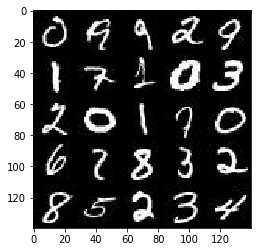

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

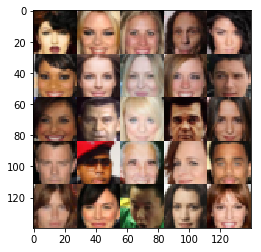

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32,(None,image_width,image_height,image_channels),name='input_real')
    inputs_z = tf.placeholder(tf.float32,(None,z_dim),name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope('discriminator',reuse=reuse):
        x1 = tf.layers.conv2d(images,64,5,strides=2,padding='same')
        x1 = tf.maximum(alpha*x1,x1)
        
        x2 = tf.layers.conv2d(x1,128,5,strides=2,padding='same')
        x2 = tf.layers.batch_normalization(x2,training=True)
        x2 = tf.maximum(alpha*x2,x2)
        
        x3 = tf.layers.conv2d(x2,256,5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3,training=True)
        x3 = tf.maximum(alpha*x3,x3)
        
        logits = tf.layers.dense(tf.reshape(x3,(-1,4*4*256)),1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function    
    reuse = not is_train
    alpha = 0.1
    
    with tf.variable_scope('generator',reuse=reuse):
        x1 = tf.layers.dense(z,7*7*512)
        x1 = tf.reshape(x1,(-1,7,7,512))
        x1 = tf.layers.batch_normalization(x1,training=is_train)
        x1 = tf.maximum(alpha*x1,x1)
        
        x2 = tf.layers.conv2d_transpose(x1,256,5,strides=2,padding='same')
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = tf.maximum(alpha*x2,x2)
        # 14*14*256
        
        x3 = tf.layers.conv2d_transpose(x2,128,5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf.maximum(alpha*x3,x3)
        # 28*28*128
        
        logits = tf.layers.conv2d_transpose(x3,out_channel_dim,5,strides=1,padding='same')        
        
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z,out_channel_dim,is_train=True)
    d_model_real,d_logits_real = discriminator(input_real,reuse=False)
    d_model_fake,d_logits_fake = discriminator(g_model,reuse=True)
    label_smoothness = 0.1
    
    d_loss_real = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_model_real)*(1-label_smoothness)))
    
    d_loss_fake = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    generator_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    #Optimize
    with tf.control_dependencies(generator_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss,var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss,var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model    
    input_real, input_z,l_rate = model_inputs(data_shape[1],data_shape[2],data_shape[3],z_dim)
    d_loss,g_loss = model_loss(input_real,input_z,data_shape[3])
    d_opt,g_opt = model_opt(d_loss,g_loss,learning_rate,beta1)
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                batch_z = np.random.uniform(-1,1,size=(batch_size,z_dim))                
                batch_images = batch_images*2
                
                # Run optimizers
                _ = sess.run(d_opt,feed_dict={input_real:batch_images,input_z:batch_z,l_rate:learning_rate})
                
                _ = sess.run(g_opt,feed_dict={input_z:batch_z,l_rate:learning_rate})
                
                # trying generator train optimization twice
                _ = sess.run(g_opt,feed_dict={input_z:batch_z,l_rate:learning_rate})
                
                
                if steps%10 == 0:
                    train_loss_d = d_loss.eval({input_z:batch_z,input_real:batch_images})
                    train_loss_g = g_loss.eval({input_z:batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))                    
                
                if steps%100 == 0:
                    show_generator_output(sess,25,input_z,data_shape[3],data_image_mode)
                    
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.2037... Generator Loss: 0.7346
Epoch 1/2... Discriminator Loss: 2.2567... Generator Loss: 0.2065
Epoch 1/2... Discriminator Loss: 2.2235... Generator Loss: 0.3499
Epoch 1/2... Discriminator Loss: 1.7972... Generator Loss: 0.5067
Epoch 1/2... Discriminator Loss: 1.8717... Generator Loss: 0.5498
Epoch 1/2... Discriminator Loss: 1.9747... Generator Loss: 0.3032
Epoch 1/2... Discriminator Loss: 1.7018... Generator Loss: 0.5380
Epoch 1/2... Discriminator Loss: 1.6458... Generator Loss: 0.7606
Epoch 1/2... Discriminator Loss: 1.5816... Generator Loss: 0.6327
Epoch 1/2... Discriminator Loss: 1.5791... Generator Loss: 0.4628


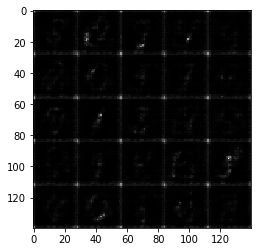

Epoch 1/2... Discriminator Loss: 1.5943... Generator Loss: 0.4645
Epoch 1/2... Discriminator Loss: 1.5728... Generator Loss: 0.8279
Epoch 1/2... Discriminator Loss: 1.4644... Generator Loss: 0.6473
Epoch 1/2... Discriminator Loss: 1.3643... Generator Loss: 0.9490
Epoch 1/2... Discriminator Loss: 1.5014... Generator Loss: 0.5010
Epoch 1/2... Discriminator Loss: 1.4867... Generator Loss: 0.5513
Epoch 1/2... Discriminator Loss: 1.6394... Generator Loss: 0.4143
Epoch 1/2... Discriminator Loss: 1.4709... Generator Loss: 0.5907
Epoch 1/2... Discriminator Loss: 1.4459... Generator Loss: 0.7449
Epoch 1/2... Discriminator Loss: 1.7528... Generator Loss: 1.6741


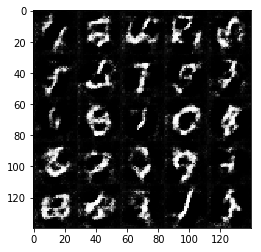

Epoch 1/2... Discriminator Loss: 1.5274... Generator Loss: 0.4469
Epoch 1/2... Discriminator Loss: 1.4838... Generator Loss: 0.6243
Epoch 1/2... Discriminator Loss: 1.4999... Generator Loss: 0.7928
Epoch 1/2... Discriminator Loss: 1.4614... Generator Loss: 0.6196
Epoch 1/2... Discriminator Loss: 1.4875... Generator Loss: 0.6148
Epoch 1/2... Discriminator Loss: 1.4213... Generator Loss: 0.8977
Epoch 1/2... Discriminator Loss: 1.3435... Generator Loss: 0.8839
Epoch 1/2... Discriminator Loss: 1.4676... Generator Loss: 0.8649
Epoch 1/2... Discriminator Loss: 1.4186... Generator Loss: 0.9594
Epoch 1/2... Discriminator Loss: 1.4275... Generator Loss: 0.9928


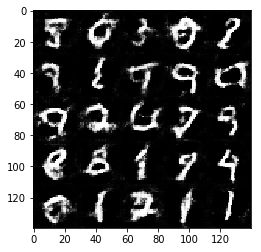

Epoch 1/2... Discriminator Loss: 1.4323... Generator Loss: 0.6113
Epoch 1/2... Discriminator Loss: 1.5557... Generator Loss: 1.1388
Epoch 1/2... Discriminator Loss: 1.3976... Generator Loss: 0.6660
Epoch 1/2... Discriminator Loss: 1.6438... Generator Loss: 0.3901
Epoch 1/2... Discriminator Loss: 1.4299... Generator Loss: 0.6879
Epoch 1/2... Discriminator Loss: 1.4884... Generator Loss: 0.5091
Epoch 1/2... Discriminator Loss: 1.5175... Generator Loss: 0.4804
Epoch 1/2... Discriminator Loss: 1.4854... Generator Loss: 0.6327
Epoch 1/2... Discriminator Loss: 1.6524... Generator Loss: 0.3825
Epoch 1/2... Discriminator Loss: 1.3970... Generator Loss: 0.9099


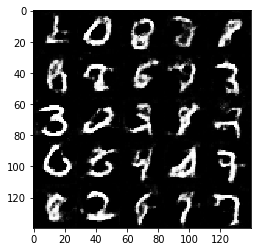

Epoch 1/2... Discriminator Loss: 1.4262... Generator Loss: 0.7682
Epoch 1/2... Discriminator Loss: 1.5348... Generator Loss: 0.6447
Epoch 1/2... Discriminator Loss: 1.6788... Generator Loss: 0.3710
Epoch 1/2... Discriminator Loss: 1.4215... Generator Loss: 0.9775
Epoch 1/2... Discriminator Loss: 1.6308... Generator Loss: 0.3933
Epoch 1/2... Discriminator Loss: 1.4513... Generator Loss: 0.7399
Epoch 2/2... Discriminator Loss: 1.4061... Generator Loss: 0.5902
Epoch 2/2... Discriminator Loss: 1.4355... Generator Loss: 0.6962
Epoch 2/2... Discriminator Loss: 1.4437... Generator Loss: 0.6596
Epoch 2/2... Discriminator Loss: 1.5174... Generator Loss: 0.4627


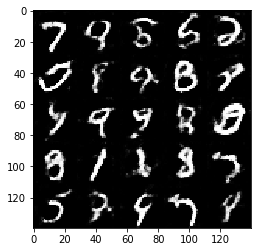

Epoch 2/2... Discriminator Loss: 1.4563... Generator Loss: 0.6681
Epoch 2/2... Discriminator Loss: 1.5311... Generator Loss: 0.4975
Epoch 2/2... Discriminator Loss: 1.5687... Generator Loss: 0.4659
Epoch 2/2... Discriminator Loss: 1.3486... Generator Loss: 0.8574
Epoch 2/2... Discriminator Loss: 1.4549... Generator Loss: 0.9933
Epoch 2/2... Discriminator Loss: 1.5126... Generator Loss: 1.2057
Epoch 2/2... Discriminator Loss: 1.3917... Generator Loss: 0.6258
Epoch 2/2... Discriminator Loss: 1.8848... Generator Loss: 0.2677
Epoch 2/2... Discriminator Loss: 1.5093... Generator Loss: 0.4713
Epoch 2/2... Discriminator Loss: 1.5355... Generator Loss: 1.3612


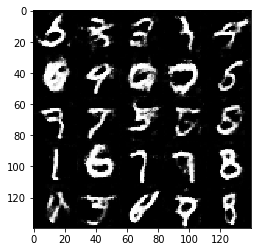

Epoch 2/2... Discriminator Loss: 1.4336... Generator Loss: 0.8473
Epoch 2/2... Discriminator Loss: 1.4994... Generator Loss: 0.5487
Epoch 2/2... Discriminator Loss: 1.4657... Generator Loss: 1.0344
Epoch 2/2... Discriminator Loss: 1.4314... Generator Loss: 0.9267
Epoch 2/2... Discriminator Loss: 1.5417... Generator Loss: 0.4250
Epoch 2/2... Discriminator Loss: 1.4665... Generator Loss: 0.8045
Epoch 2/2... Discriminator Loss: 1.5126... Generator Loss: 0.5531
Epoch 2/2... Discriminator Loss: 1.4794... Generator Loss: 0.5768
Epoch 2/2... Discriminator Loss: 1.7937... Generator Loss: 0.3014
Epoch 2/2... Discriminator Loss: 1.5724... Generator Loss: 0.4270


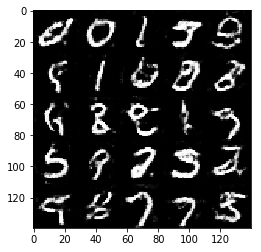

Epoch 2/2... Discriminator Loss: 1.5899... Generator Loss: 0.4476
Epoch 2/2... Discriminator Loss: 1.5689... Generator Loss: 0.4628
Epoch 2/2... Discriminator Loss: 1.4730... Generator Loss: 0.9808
Epoch 2/2... Discriminator Loss: 1.4150... Generator Loss: 0.5500
Epoch 2/2... Discriminator Loss: 1.6323... Generator Loss: 0.3820
Epoch 2/2... Discriminator Loss: 2.3480... Generator Loss: 0.1633
Epoch 2/2... Discriminator Loss: 1.4654... Generator Loss: 0.6296
Epoch 2/2... Discriminator Loss: 1.4210... Generator Loss: 0.5867
Epoch 2/2... Discriminator Loss: 1.4751... Generator Loss: 0.5107
Epoch 2/2... Discriminator Loss: 1.4387... Generator Loss: 1.0280


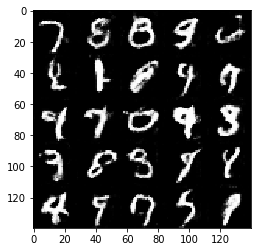

Epoch 2/2... Discriminator Loss: 1.5809... Generator Loss: 0.4637
Epoch 2/2... Discriminator Loss: 1.3634... Generator Loss: 0.7179
Epoch 2/2... Discriminator Loss: 1.5462... Generator Loss: 1.1321
Epoch 2/2... Discriminator Loss: 1.3959... Generator Loss: 0.6986
Epoch 2/2... Discriminator Loss: 1.4077... Generator Loss: 0.6094
Epoch 2/2... Discriminator Loss: 1.3988... Generator Loss: 1.0430
Epoch 2/2... Discriminator Loss: 1.4369... Generator Loss: 0.6876
Epoch 2/2... Discriminator Loss: 1.3647... Generator Loss: 0.7055
Epoch 2/2... Discriminator Loss: 1.5914... Generator Loss: 0.4107
Epoch 2/2... Discriminator Loss: 1.2862... Generator Loss: 1.1142


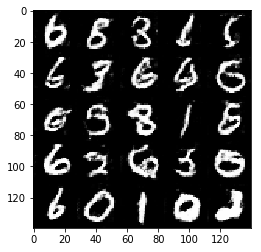

Epoch 2/2... Discriminator Loss: 1.5961... Generator Loss: 0.5680
Epoch 2/2... Discriminator Loss: 1.4258... Generator Loss: 0.7196
Epoch 2/2... Discriminator Loss: 1.3879... Generator Loss: 0.6819


In [14]:
batch_size = 128
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.8903... Generator Loss: 0.1921
Epoch 1/1... Discriminator Loss: 2.0255... Generator Loss: 0.5000
Epoch 1/1... Discriminator Loss: 1.8155... Generator Loss: 1.0936
Epoch 1/1... Discriminator Loss: 2.7357... Generator Loss: 0.2767
Epoch 1/1... Discriminator Loss: 2.2025... Generator Loss: 0.3897
Epoch 1/1... Discriminator Loss: 2.1622... Generator Loss: 0.5206
Epoch 1/1... Discriminator Loss: 1.8772... Generator Loss: 0.5472
Epoch 1/1... Discriminator Loss: 1.8155... Generator Loss: 0.5990
Epoch 1/1... Discriminator Loss: 1.8082... Generator Loss: 0.5098
Epoch 1/1... Discriminator Loss: 1.7058... Generator Loss: 0.6345


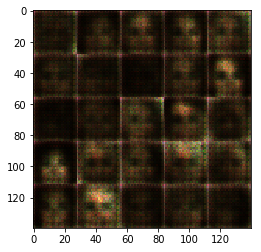

Epoch 1/1... Discriminator Loss: 1.6024... Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.6764... Generator Loss: 0.5979
Epoch 1/1... Discriminator Loss: 1.6745... Generator Loss: 0.5217
Epoch 1/1... Discriminator Loss: 1.6084... Generator Loss: 0.5858
Epoch 1/1... Discriminator Loss: 1.7143... Generator Loss: 0.5963
Epoch 1/1... Discriminator Loss: 1.5818... Generator Loss: 0.7322
Epoch 1/1... Discriminator Loss: 1.6431... Generator Loss: 0.5515
Epoch 1/1... Discriminator Loss: 1.5599... Generator Loss: 0.6449
Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.7211
Epoch 1/1... Discriminator Loss: 1.3097... Generator Loss: 1.0228


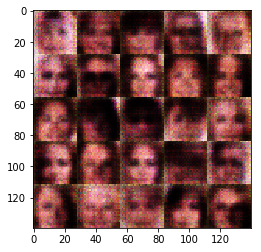

Epoch 1/1... Discriminator Loss: 1.4440... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 1.5652... Generator Loss: 0.5800
Epoch 1/1... Discriminator Loss: 1.4665... Generator Loss: 0.7048
Epoch 1/1... Discriminator Loss: 1.5063... Generator Loss: 0.8338
Epoch 1/1... Discriminator Loss: 1.5983... Generator Loss: 0.4788
Epoch 1/1... Discriminator Loss: 1.5720... Generator Loss: 0.6176
Epoch 1/1... Discriminator Loss: 1.6022... Generator Loss: 0.5132
Epoch 1/1... Discriminator Loss: 1.4325... Generator Loss: 1.2102
Epoch 1/1... Discriminator Loss: 1.4734... Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 1.6337... Generator Loss: 0.5844


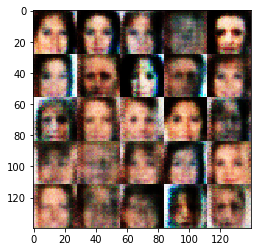

Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.8182
Epoch 1/1... Discriminator Loss: 1.6454... Generator Loss: 0.6229
Epoch 1/1... Discriminator Loss: 1.5389... Generator Loss: 0.6072
Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.9124
Epoch 1/1... Discriminator Loss: 1.5473... Generator Loss: 0.5802
Epoch 1/1... Discriminator Loss: 1.6273... Generator Loss: 0.7282
Epoch 1/1... Discriminator Loss: 1.5264... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 1.5530... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.5534... Generator Loss: 0.7474
Epoch 1/1... Discriminator Loss: 1.5219... Generator Loss: 0.7836


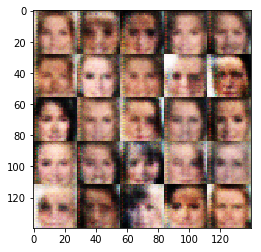

Epoch 1/1... Discriminator Loss: 1.5255... Generator Loss: 0.6625
Epoch 1/1... Discriminator Loss: 1.5010... Generator Loss: 0.7312
Epoch 1/1... Discriminator Loss: 1.5553... Generator Loss: 0.6838
Epoch 1/1... Discriminator Loss: 1.4856... Generator Loss: 0.7121
Epoch 1/1... Discriminator Loss: 1.4836... Generator Loss: 0.7545
Epoch 1/1... Discriminator Loss: 1.4109... Generator Loss: 0.7922
Epoch 1/1... Discriminator Loss: 1.4272... Generator Loss: 0.7461
Epoch 1/1... Discriminator Loss: 1.4873... Generator Loss: 0.7437
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.7530
Epoch 1/1... Discriminator Loss: 1.5142... Generator Loss: 0.7324


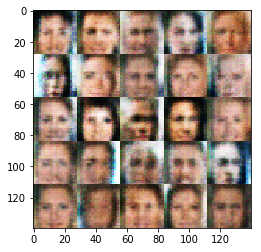

Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.6229... Generator Loss: 0.6596
Epoch 1/1... Discriminator Loss: 1.4701... Generator Loss: 0.7733
Epoch 1/1... Discriminator Loss: 1.4922... Generator Loss: 0.7228
Epoch 1/1... Discriminator Loss: 1.4630... Generator Loss: 0.6898
Epoch 1/1... Discriminator Loss: 1.5151... Generator Loss: 0.7068
Epoch 1/1... Discriminator Loss: 1.4808... Generator Loss: 0.7605
Epoch 1/1... Discriminator Loss: 1.5289... Generator Loss: 0.7285
Epoch 1/1... Discriminator Loss: 1.4988... Generator Loss: 0.7193
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 0.7578


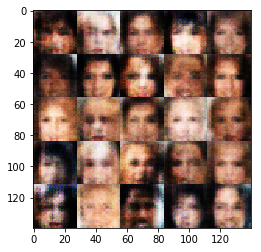

Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.4266... Generator Loss: 0.7443
Epoch 1/1... Discriminator Loss: 1.5268... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.7310
Epoch 1/1... Discriminator Loss: 1.4128... Generator Loss: 0.8054
Epoch 1/1... Discriminator Loss: 1.4877... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 1.4698... Generator Loss: 0.7485
Epoch 1/1... Discriminator Loss: 1.4316... Generator Loss: 0.7543
Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.7726
Epoch 1/1... Discriminator Loss: 1.4454... Generator Loss: 0.7619


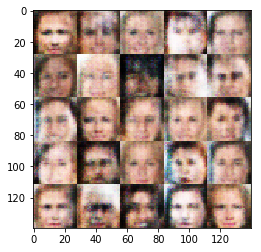

Epoch 1/1... Discriminator Loss: 1.4489... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.7764
Epoch 1/1... Discriminator Loss: 1.4481... Generator Loss: 0.7282
Epoch 1/1... Discriminator Loss: 1.4403... Generator Loss: 0.7494
Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 1.4906... Generator Loss: 0.6981
Epoch 1/1... Discriminator Loss: 1.4519... Generator Loss: 0.7582
Epoch 1/1... Discriminator Loss: 1.4458... Generator Loss: 0.7614
Epoch 1/1... Discriminator Loss: 1.4587... Generator Loss: 0.7530
Epoch 1/1... Discriminator Loss: 1.4688... Generator Loss: 0.7228


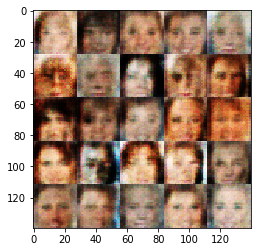

Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 0.7721
Epoch 1/1... Discriminator Loss: 1.4313... Generator Loss: 0.7349
Epoch 1/1... Discriminator Loss: 1.4542... Generator Loss: 0.7414
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.8033
Epoch 1/1... Discriminator Loss: 1.4590... Generator Loss: 0.7591
Epoch 1/1... Discriminator Loss: 1.4794... Generator Loss: 0.7012
Epoch 1/1... Discriminator Loss: 1.4718... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.7383
Epoch 1/1... Discriminator Loss: 1.4329... Generator Loss: 0.7996
Epoch 1/1... Discriminator Loss: 1.4667... Generator Loss: 0.7249


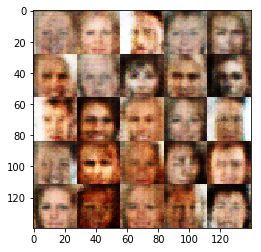

Epoch 1/1... Discriminator Loss: 1.4518... Generator Loss: 0.7671
Epoch 1/1... Discriminator Loss: 1.4263... Generator Loss: 0.7786
Epoch 1/1... Discriminator Loss: 1.4126... Generator Loss: 0.7438
Epoch 1/1... Discriminator Loss: 1.4344... Generator Loss: 0.7297
Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.7825
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.7961
Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.7372
Epoch 1/1... Discriminator Loss: 1.4491... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.4713... Generator Loss: 0.7234
Epoch 1/1... Discriminator Loss: 1.4639... Generator Loss: 0.7534


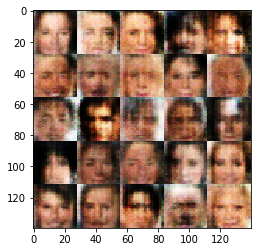

Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.7523
Epoch 1/1... Discriminator Loss: 1.4150... Generator Loss: 0.7758
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.4447... Generator Loss: 0.7551
Epoch 1/1... Discriminator Loss: 1.4451... Generator Loss: 0.7505
Epoch 1/1... Discriminator Loss: 1.4240... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.4490... Generator Loss: 0.7663
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.7594
Epoch 1/1... Discriminator Loss: 1.4657... Generator Loss: 0.7461


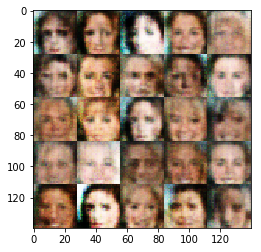

Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.7715
Epoch 1/1... Discriminator Loss: 1.4483... Generator Loss: 0.7457
Epoch 1/1... Discriminator Loss: 1.4380... Generator Loss: 0.7612
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.7532
Epoch 1/1... Discriminator Loss: 1.4064... Generator Loss: 0.7660
Epoch 1/1... Discriminator Loss: 1.4313... Generator Loss: 0.7789
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 0.7432
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 0.7000
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.7857


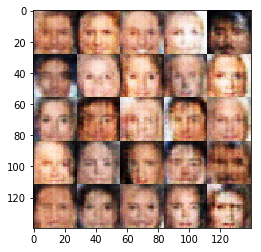

Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.7515
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.7993
Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.7403
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.7654
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.7946
Epoch 1/1... Discriminator Loss: 1.4268... Generator Loss: 0.7624
Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.7323
Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.7626
Epoch 1/1... Discriminator Loss: 1.4655... Generator Loss: 0.7144
Epoch 1/1... Discriminator Loss: 1.4995... Generator Loss: 0.7058


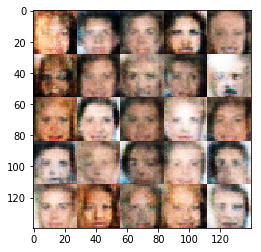

Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.7811
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.7784
Epoch 1/1... Discriminator Loss: 1.4033... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.4808... Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 1.4007... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 1.4576... Generator Loss: 0.7134
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.8173
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.7955
Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 0.7797


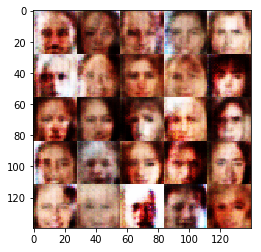

Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.3967... Generator Loss: 0.7586
Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.8036
Epoch 1/1... Discriminator Loss: 1.4463... Generator Loss: 0.7504
Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.4035... Generator Loss: 0.7627
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.7696
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.7286
Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.7649


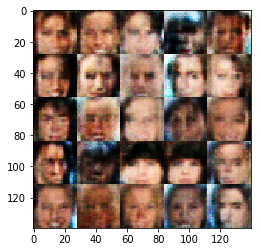

Epoch 1/1... Discriminator Loss: 1.4401... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.7486
Epoch 1/1... Discriminator Loss: 1.4699... Generator Loss: 0.7674
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.7529
Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.7586
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.7557
Epoch 1/1... Discriminator Loss: 1.4320... Generator Loss: 0.7801
Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.7355


In [15]:
batch_size = 128
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.